In [1]:
import os
import math

import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=1000)

rd_seed = 333

In [2]:
path_file = os.sep.join(['created_data', 'matrix_bak_2015.csv'])
matrix = pd.read_csv(path_file, sep=",", index_col='studium_id') 

In [3]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 12375406 to 11740806
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pohlavi_kod             3936 non-null   int64  
 1   je_cech                 3936 non-null   int64  
 2   datum_zahajeni          3936 non-null   int64  
 3   rok_maturity            3936 non-null   int64  
 4   maturita_nastup_rozdil  3936 non-null   int64  
 5   gymnazium               3936 non-null   int64  
 6   praha                   3936 non-null   int64  
 7   scio                    3936 non-null   int64  
 8   olym                    3936 non-null   int64  
 9   zkouska                 3936 non-null   int64  
 10  prominuti               3936 non-null   int64  
 11  dostudoval_uspesne      3936 non-null   int64  
 12  BI-PA1                  3866 non-null   float64
 13  BI-PAI                  3867 non-null   float64
 14  BI-CAO                  3869 

In [4]:
matrix

,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,dostudoval_uspesne,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12375406,0,1,2015,2009,6,0,1,0,0,0,0,1,2.5,2.0,2.5,3.0,2.5,2.5,3.0,2.5,2.5,2.5,NaN,3.0,3.0,3.0,2.5,2.5,2.0,1.0,2.0,2.0
11736906,0,1,2015,2009,6,1,0,0,0,0,0,0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12032306,0,1,2015,2007,8,0,1,0,0,0,0,0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15613006,0,1,2018,2009,9,1,1,0,0,0,0,0,1.0,2.5,1.0,2.5,1.5,2.0,1.5,1.5,1.0,3.0,1.5,2.5,2.0,2.5,1.5,2.5,1.5,NaN,2.0,1.5
12948006,1,1,2016,2010,6,1,0,0,0,0,0,1,3.0,2.0,1.5,2.5,1.5,2.5,2.5,2.0,1.0,3.0,2.5,2.0,2.0,2.5,2.5,2.5,2.0,1.0,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18639206,0,1,2020,2020,0,0,1,1,1,1,0,0,4.0,2.5,1.5,3.0,2.0,4.0,4.0,2.5,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11677106,0,1,2015,2003,12,0,1,0,0,0,0,0,4.0,2.5,1.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13513806,0,1,2016,2006,10,0,1,0,0,0,0,0,4.0,4.0,1.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Selekce atributů

In [5]:
# odstraneni neznamkovych atributu
matrix = matrix.drop(columns=['dostudoval_uspesne', 'pohlavi_kod', 'je_cech', 'datum_zahajeni',
                             'rok_maturity', 'maturita_nastup_rozdil', 'gymnazium',
                             'praha', 'scio', 'olym', 'zkouska', 'prominuti'])

In [6]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 12375406 to 11740806
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-PA1    3866 non-null   float64
 1   BI-PAI    3867 non-null   float64
 2   BI-CAO    3869 non-null   float64
 3   BI-PS1    3870 non-null   float64
 4   BI-MLO    3869 non-null   float64
 5   BI-ZMA    3863 non-null   float64
 6   BI-PA2    2225 non-null   float64
 7   BI-DBS    2498 non-null   float64
 8   BI-SAP    2462 non-null   float64
 9   BI-LIN    2387 non-null   float64
 10  BI-AG1    1586 non-null   float64
 11  BI-AAG    1806 non-null   float64
 12  BI-ZDM    1717 non-null   float64
 13  BI-OSY    1273 non-null   float64
 14  BI-PSI    1458 non-null   float64
 15  BI-BEZ    1358 non-null   float64
 16  BI-PST    1063 non-null   float64
 17  BI-DPR    915 non-null    float64
 18  BI-SI1.2  1252 non-null   float64
 19  BI-EMP    1417 non-null   float64
dtypes: float64(20)
memo

## Doplnění NaN hodnot

In [7]:
imp = KNNImputer(n_neighbors=5)
matrix = pd.DataFrame(imp.fit_transform(matrix), index=matrix.index, columns=matrix.columns)

In [8]:
matrix

,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,
12375406,2.5,2.0,2.5,3.0,2.5,2.5,3.0,2.5,2.5,2.5,2.7,3.0,3.0,3.0,2.5,2.5,2.0,1.0,2.0,2.0
11736906,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.6,3.6,3.7,4.0,4.0,3.7,3.1,3.4,3.5,2.9,1.8,3.2,2.9
12032306,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.6,3.6,3.7,4.0,4.0,3.7,3.1,3.4,3.5,2.9,1.8,3.2,2.9
15613006,1.0,2.5,1.0,2.5,1.5,2.0,1.5,1.5,1.0,3.0,1.5,2.5,2.0,2.5,1.5,2.5,1.5,1.7,2.0,1.5
12948006,3.0,2.0,1.5,2.5,1.5,2.5,2.5,2.0,1.0,3.0,2.5,2.0,2.0,2.5,2.5,2.5,2.0,1.0,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18639206,4.0,2.5,1.5,3.0,2.0,4.0,4.0,2.5,4.0,4.0,4.0,4.0,4.0,4.0,3.7,3.7,3.7,1.5,3.0,2.8
11677106,4.0,2.5,1.0,4.0,4.0,4.0,4.0,4.0,3.6,3.7,4.0,4.0,4.0,3.3,3.5,4.0,3.8,2.3,2.6,2.6
13513806,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,3.4,3.7,4.0,4.0,4.0,3.5,3.5,4.0,3.8,3.0,2.6,3.5


## Zaokrouhlení doplněných hodnot

In [9]:
grades = [1, 1.5, 2, 2.5, 3, 4]

In [10]:
def custom_round(value):
    return min(grades, key=lambda x:abs(x-value))

In [11]:
matrix = matrix.applymap(custom_round)

In [12]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 12375406 to 11740806
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-PA1    3936 non-null   float64
 1   BI-PAI    3936 non-null   float64
 2   BI-CAO    3936 non-null   float64
 3   BI-PS1    3936 non-null   float64
 4   BI-MLO    3936 non-null   float64
 5   BI-ZMA    3936 non-null   float64
 6   BI-PA2    3936 non-null   float64
 7   BI-DBS    3936 non-null   float64
 8   BI-SAP    3936 non-null   float64
 9   BI-LIN    3936 non-null   float64
 10  BI-AG1    3936 non-null   float64
 11  BI-AAG    3936 non-null   float64
 12  BI-ZDM    3936 non-null   float64
 13  BI-OSY    3936 non-null   float64
 14  BI-PSI    3936 non-null   float64
 15  BI-BEZ    3936 non-null   float64
 16  BI-PST    3936 non-null   float64
 17  BI-DPR    3936 non-null   float64
 18  BI-SI1.2  3936 non-null   float64
 19  BI-EMP    3936 non-null   float64
dtypes: float64(20)
memo

## Rozdělení datasetu

In [13]:
train, test = train_test_split(matrix, test_size=0.2, shuffle=True)

## Nastavení param_grid 

In [14]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'] 
}
param_comb = ParameterGrid(param_grid)

In [15]:
courses = np.array(matrix.columns.unique())

In [16]:
def get_prediction(course):
    # rozdeleni datasetu
    Xtrain_course = train.drop(columns=course)
    ytrain_course = train[course]
    Xtest_course = test.drop(columns=course)
    ytest_course = test[course]
    
    # zmena priznaku na kategoricke ordinalni
    grades_category = pd.api.types.CategoricalDtype(categories=[1, 1.5, 2, 2.5, 3, 4], ordered=True)
    course_arr = np.array(course)
    feature_courses = np.setdiff1d(course_arr, courses)
    for feature in feature_courses:
        Xtrain_course[feature] = Xtrain_course[feature].astype(grades_category)
        Xtest_course[feature] = Xtest_course[feature].astype(grades_category)
    
    # create model
    model = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
    model.fit(Xtrain_course, ytrain_course)
    
    # get prediction
    y_train_predicted = model.predict(Xtrain_course)
    y_test_predicted = model.predict(Xtest_course)
    
    # get RMSE
    train_err = np.sqrt(mean_squared_error(model.predict(Xtrain_course), np.array(ytrain_course)))
    test_err = np.sqrt(mean_squared_error(model.predict(Xtest_course), np.array(ytest_course)))
    return model, train_err, test_err

## PA1

In [17]:
knn_pa1, train_pa1_err, test_pa1_err = get_prediction('BI-PA1')

In [18]:
print('RMSE reg (train):', train_pa1_err)
print('RMSE reg (test):', test_pa1_err)

RMSE reg (train): 0.06100499125537693
RMSE reg (test): 0.49767630640058846


## PAI

In [19]:
knn_pai, train_pai_err, test_pai_err = get_prediction('BI-PAI')

In [20]:
print('RMSE reg (train):', train_pai_err)
print('RMSE reg (test):', test_pai_err)

RMSE reg (train): 0.08653493899977793
RMSE reg (test): 0.43054620532625076


## ZMA

In [21]:
knn_zma, train_zma_err, test_zma_err = get_prediction('BI-PAI')

In [22]:
print('RMSE reg (train):', train_zma_err)
print('RMSE reg (test):', test_zma_err)

RMSE reg (train): 0.08653493899977793
RMSE reg (test): 0.43054620532625076


## MLO

In [23]:
knn_mlo, train_mlo_err, test_mlo_err = get_prediction('BI-MLO')

In [24]:
print('RMSE reg (train):', train_mlo_err)
print('RMSE reg (test):', test_mlo_err)

RMSE reg (train): 0.049850209766937874
RMSE reg (test): 0.46770000093546577


## CAO

In [25]:
knn_cao, train_cao_err, test_cao_err = get_prediction('BI-CAO')

In [26]:
print('RMSE reg (train):', train_cao_err)
print('RMSE reg (test):', test_cao_err)

RMSE reg (train): 0.06551560445650166
RMSE reg (test): 0.4071222236404046


## PS1

In [27]:
knn_ps1, train_ps1_err, test_ps1_err = get_prediction('BI-PS1')

In [28]:
print('RMSE reg (train):', train_ps1_err)
print('RMSE reg (test):', test_ps1_err)

RMSE reg (train): 0.07378301061663439
RMSE reg (test): 0.5240146506005744


## PA2

In [29]:
knn_pa2, train_pa2_err, test_pa2_err = get_prediction('BI-PA2')

In [30]:
print('RMSE reg (train):', train_pa2_err)
print('RMSE reg (test):', test_pa2_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.41045660849765286


## LIN

In [31]:
knn_lin, train_lin_err, test_lin_err = get_prediction('BI-LIN')

In [32]:
print('RMSE reg (train):', train_lin_err)
print('RMSE reg (test):', test_lin_err)

RMSE reg (train): 0.009625560705242096
RMSE reg (test): 0.36418759854436067


## DBS

In [33]:
knn_dbs, train_dbs_err, test_dbs_err = get_prediction('BI-DBS')

In [34]:
print('RMSE reg (train):', train_dbs_err)
print('RMSE reg (test):', test_dbs_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.488071167958036


## SAP

In [35]:
knn_sap, train_sap_err, test_sap_err = get_prediction('BI-SAP')

In [36]:
print('RMSE reg (train):', train_sap_err)
print('RMSE reg (test):', test_sap_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.5923268825969333


## AAG

In [37]:
knn_aag, train_aag_err, test_aag_err = get_prediction('BI-AAG')

In [38]:
print('RMSE reg (train):', train_aag_err)
print('RMSE reg (test):', test_aag_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.38485142257284133


## AG1

In [39]:
knn_ag1, train_ag1_err, test_ag1_err = get_prediction('BI-AG1')

In [40]:
print('RMSE reg (train):', train_ag1_err)
print('RMSE reg (test):', test_ag1_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.35853091626779815


## ZDM

In [41]:
knn_zdm, train_zdm_err, test_zdm_err = get_prediction('BI-ZDM')

In [42]:
print('RMSE reg (train):', train_zdm_err)
print('RMSE reg (test):', test_zdm_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.33650945747154604


## OSY

In [43]:
knn_osy, train_osy_err, test_osy_err = get_prediction('BI-OSY')

In [44]:
print('RMSE reg (train):', train_osy_err)
print('RMSE reg (test):', test_osy_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.387073218856445


## PSI

In [45]:
knn_psi, train_psi_err, test_psi_err = get_prediction('BI-PSI')

In [46]:
print('RMSE reg (train):', train_psi_err)
print('RMSE reg (test):', test_psi_err)

RMSE reg (train): 0.012602817296618407
RMSE reg (test): 0.36935084435620824


## BEZ

In [47]:
knn_bez, train_bez_err, test_bez_err = get_prediction('BI-BEZ')

In [48]:
print('RMSE reg (train):', train_bez_err)
print('RMSE reg (test):', test_bez_err)

RMSE reg (train): 0.006301408648309204
RMSE reg (test): 0.3437481256588829


## PST

In [49]:
knn_pst, train_pst_err, test_pst_err = get_prediction('BI-PST')

In [50]:
print('RMSE reg (train):', train_pst_err)
print('RMSE reg (test):', test_pst_err)

RMSE reg (train): 0.023009491071580592
RMSE reg (test): 0.3489138979314237


## DPR

In [51]:
knn_dpr, train_dpr_err, test_dpr_err = get_prediction('BI-DPR')

In [52]:
print('RMSE reg (train):', train_dpr_err)
print('RMSE reg (test):', test_dpr_err)

RMSE reg (train): 0.03500922610896784
RMSE reg (test): 0.40793514904594474


## EMP

In [53]:
knn_emp, train_emp_err, test_emp_err = get_prediction('BI-EMP')

In [54]:
print('RMSE reg (train):', train_emp_err)
print('RMSE reg (test):', test_emp_err)

RMSE reg (train): 0.011504745535790296
RMSE reg (test): 0.5058002637224879


## SI1.2

In [55]:
knn_si1, train_si1_err, test_si1_err = get_prediction('BI-SI1.2')

In [56]:
print('RMSE reg (train):', train_si1_err)
print('RMSE reg (test):', test_si1_err)

RMSE reg (train): 0.03527288188576169
RMSE reg (test): 0.42764945932205783


# Výsledky

No handles with labels found to put in legend.


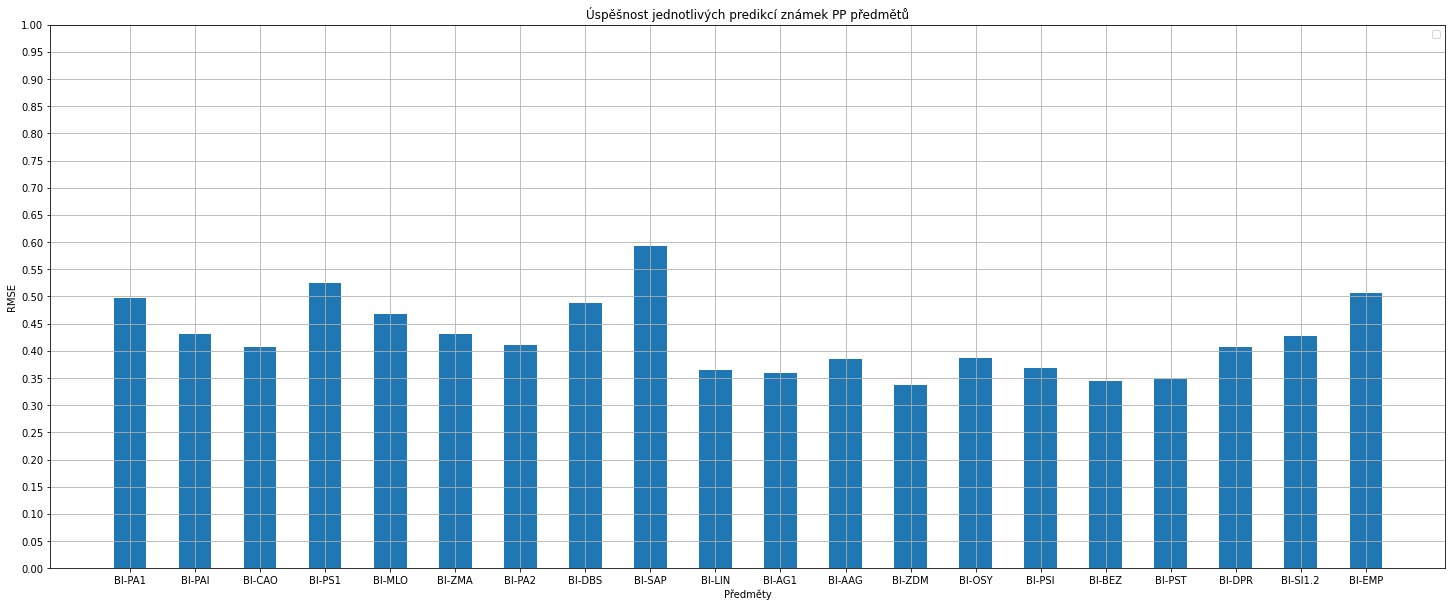

In [57]:
y = [
    test_pa1_err,
    test_pai_err,
    test_cao_err,
    test_ps1_err,
    test_mlo_err,
    test_zma_err,
    test_pa2_err,
    test_dbs_err,
    test_sap_err,
    test_lin_err,
    test_ag1_err,
    test_aag_err,
    test_zdm_err,
    test_osy_err,
    test_psi_err,
    test_bez_err,
    test_pst_err,
    test_dpr_err,
    test_si1_err,
    test_emp_err
]

x = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA', 'BI-PA2',
       'BI-DBS', 'BI-SAP', 'BI-LIN', 'BI-AG1', 'BI-AAG', 'BI-ZDM', 'BI-OSY',
       'BI-PSI', 'BI-BEZ', 'BI-PST', 'BI-DPR', 'BI-SI1.2', 'BI-EMP']
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects_dt = ax.bar(x , y, width)

y_values = np.arange(0.0, 1.05, 0.05)

ax.set_ylabel('RMSE')
ax.set_xlabel('Předměty')
ax.set_title('Úspěšnost jednotlivých predikcí známek PP předmětů')
ax.set_xticks(x)
plt.yticks(y_values)
ax.legend(loc='best')
ax.grid(True)

plt.ylim(ymin=0)
plt.ylim(ymax=1)

fig.set_size_inches(25,10)
plt.show()